# Лабараторная работа №4
# Применение методов классификации

Импорты библиотек:

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, roc_curve, auc

### Проведём предварительную обработку данных:

Импортируем датафрейм:

In [44]:
gym_df = pd.read_csv('C:/Users/dmitr/Downloads/5gym_churn.csv')
gym_df.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Приведём названия столбцов к общему виду:

In [45]:
gym_df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [46]:
gym_df = gym_df.rename(columns={'gender': 'Gender'})
gym_df.columns

Index(['Gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

Проверим датафрейм на наличие пропущеных значений:

In [47]:
gym_df.isna().sum()

Gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Проверим датафрейм на наличие явных дубликатов:

In [48]:
print(gym_df.duplicated().sum())

0


Приведём столбец "Month_to_end_contract" к типу данных "int64":

In [49]:
gym_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [50]:
gym_df.astype({'Month_to_end_contract': 'int64'}).dtypes

Gender                                 int64
Near_Location                          int64
Partner                                int64
Promo_friends                          int64
Phone                                  int64
Contract_period                        int64
Group_visits                           int64
Age                                    int64
Avg_additional_charges_total         float64
Month_to_end_contract                  int64
Lifetime                               int64
Avg_class_frequency_total            float64
Avg_class_frequency_current_month    float64
Churn                                  int64
dtype: object

Проверим датафрейм на наличие неявных дубликатов:

In [51]:
print("Gender: " + str(gym_df['Gender'].unique()))
print("Near_Location: " + str(gym_df['Near_Location'].unique()))
print("Partner: " + str(gym_df['Partner'].unique()))
print("Promo_friends: " + str(gym_df['Promo_friends'].unique()))
print("Phone: " + str(gym_df['Phone'].unique()))
print("Contract_period: " + str(gym_df['Contract_period'].unique()))
print("Group_visits: " + str(gym_df['Group_visits'].unique()))
print("Age: " + str(gym_df['Age'].unique()))
print("Avg_additional_charges_total: " + str(gym_df['Avg_additional_charges_total'].unique()))
print("Month_to_end_contract: " + str(gym_df['Month_to_end_contract'].unique()))
print("Avg_class_frequency_total: " + str(gym_df['Avg_class_frequency_total'].unique()))
print("Avg_class_frequency_current_month: " + str(gym_df['Avg_class_frequency_current_month'].unique()))
print("Churn: " + str(gym_df['Churn'].unique()))

Gender: [1 0]
Near_Location: [1 0]
Partner: [1 0]
Promo_friends: [1 0]
Phone: [0 1]
Contract_period: [ 6 12  1]
Group_visits: [1 0]
Age: [29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
Avg_additional_charges_total: [ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
Month_to_end_contract: [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
Avg_class_frequency_total: [0.02039795 1.92293606 1.85909835 ... 2.78614636 1.63010814 1.10183221]
Avg_class_frequency_current_month: [0.         1.91024352 1.73650189 ... 2.8314395  1.59623664 1.03526976]
Churn: [0 1]


Обработка данных завершена:

In [52]:
gym_df.head(10)

,Gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


Целевым признаком выберем колонку с информацией покинул ли человек фитнес клуб или нет - Churn. Уберём из таблицы с признаками столбцы, сильно коррелирующие друг с другом, а также значения, слишком слабо коррелирующие с целевым признаком:

<AxesSubplot:>

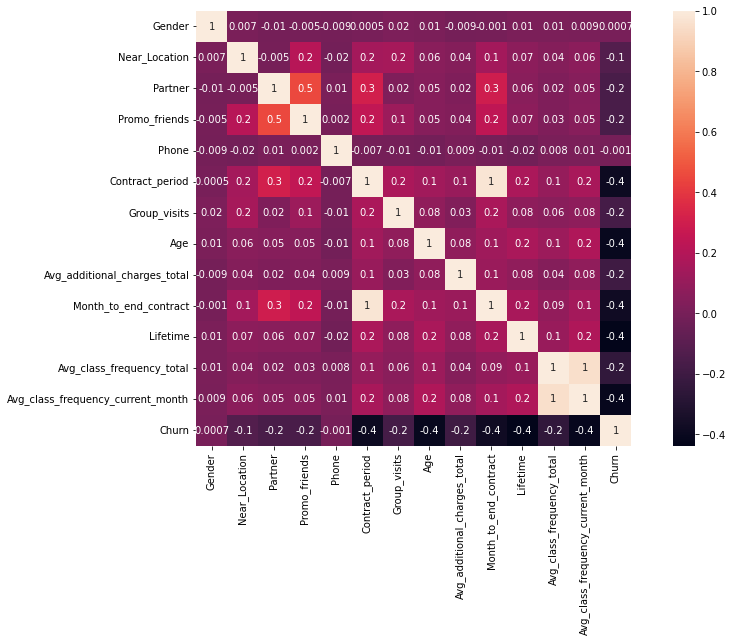

In [53]:
plt.figure(figsize = (15,8))
sns.heatmap(gym_df.corr(), annot = True, fmt='.1g', square=True)

In [54]:
sc = StandardScaler()

In [55]:
y = gym_df['Churn'] # Вектор целевой переменной
x = sc.fit_transform(gym_df.drop(['Churn', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Gender', 'Phone'], axis=1)) # Матрица объект-признак

Разобъём набор данных на тренировочной и тестовый датасеты с помощью train_test_split:

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

### Разработаем предсказательную модель качественного отклика методом *k-ближайших соседей*:

In [57]:
knn = KNeighborsClassifier(metric='euclidean') # Инициализируем модель
knn.fit(x_train, y_train)
train_predictions = knn.predict(x_test)

Количество соседей в данной метрике по стандарту выбирается равным 5. Была выбрана евклидова метрика из-за её простоты и популярности. Значение параметра "weights" по умолчанию устанавливается как uniforn, чтобы точки расположенные на разном расстоянии от исследуемой имели одинаковый вес.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [58]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print('accuracy: ' + str(acc)) # Доля правильных ответов
print('precision: ' + str(pre)) # Точность
print('recall: ' + str(rec)) # Полнота
print('balanced accuracy: ' + str(bal_acc)) # Баланс между метриками
print('f1: ' + str(f1))

accuracy: 0.885
precision: 0.7852760736196319
recall: 0.7901234567901234
balanced accuracy: 0.8551073904955183
f1: 0.7876923076923078


Высчитаем матрицу ошибок:

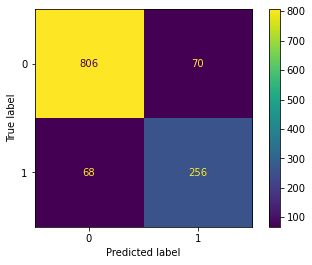

True Positive: 256
False Positive: 70
True Negative: 806
False Negative: 68


In [59]:
cm = confusion_matrix(y_test,train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения
print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

Высчитаем ROC AUC:

In [60]:
knn_probs = knn.predict_proba(x_test) # получаем предказания
knn_probs = knn_probs[:, 1] # сохраняем вероятности только для положительного исхода
knn_auc = roc_auc_score(y_test, knn_probs) # рассчитываем ROC AUC
print('Метод k-ближайших соседей: ROC AUC=' + str(knn_auc))
fpr_knn, tpr_knn, treshold = roc_curve(y_test, knn_probs) # рассчитываем roc-кривую
knn_roc_auc = auc(fpr_knn, tpr_knn)

Метод k-ближайших соседей: ROC AUC=0.9281561812954506


### Разработаем предсказательную модель качественного отклика методом *логистической регрессии*:

In [63]:
lr = LogisticRegression(max_iter=1000) # Инициализируем модель
lr.fit(x_train, y_train)
train_predictions = lr.predict(x_test)

Максимальное количество итераций, необходимых для сходимости, по умолчанию равное 100 было выбрано равным 1000, так как в ином случае алгоритм не получается сделать сходящимся за заданное количество итераций.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [42]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print('accuracy: ' + str(acc))
print('precision: ' + str(pre))
print('recall: ' + str(rec))
print('balanced accuracy: ' + str(bal_acc))
print('f1: ' + str(f1))

accuracy: 0.9191666666666667
precision: 0.8492307692307692
recall: 0.8518518518518519
balanced accuracy: 0.8979578893962455
f1: 0.8505392912172572


Высчитаем матрицу ошибок:

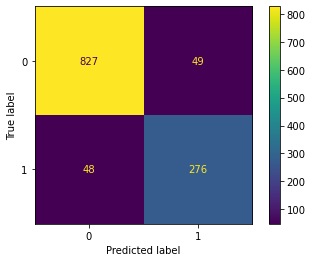

True Positive: 276
False Positive: 49
True Negative: 827
False Negative: 48


In [21]:
cm = confusion_matrix(y_test, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения
print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

Высчитаем ROC AUC:

In [22]:
lr_probs = lr.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('Логистическая регрессия: ROC AUC=' +str(lr_auc))
fpr_lr, tpr_lr, treshold = roc_curve(y_test, lr_probs)
lr_roc_auc = auc(fpr_lr, tpr_lr)

Логистическая регрессия: ROC AUC=0.9686213991769548


### Разработаем предсказательную модель качественного отклика методом *случайного леса*:

In [23]:
rfc = RandomForestClassifier() # Инициализируем модель
rfc.fit(x_train, y_train)
train_predictions = rfc.predict(x_test)

Знеачение "max_depth" по умолчанию равно "None", что означает что узлы будут расширяться до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать выборок меньше, чем "min_samples_split", которое по умолчанию равно двойке.

Подсчитаем метрики "Accuracy", "Precision", "Recall", "Balanced accuracy", "F1 score":

In [24]:
acc = accuracy_score(y_test, train_predictions)
pre = precision_score(y_test, train_predictions)
rec = recall_score(y_test, train_predictions)
bal_acc = balanced_accuracy_score(y_test, train_predictions)
f1 = f1_score(y_test, train_predictions)
print('accuracy: ' + str(acc))
print('precision: ' + str(pre))
print('recall: ' + str(rec))
print('balanced accuracy: ' + str(bal_acc))
print('f1: ' + str(f1))

accuracy: 0.9075
precision: 0.8469055374592834
recall: 0.8024691358024691
balanced accuracy: 0.8744080838829698
f1: 0.8240887480190175


Высчитаем матрицу ошибок:

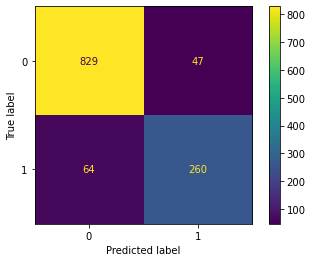

True Positive: 260
False Positive: 47
True Negative: 829
False Negative: 64


In [25]:
cm = confusion_matrix(y_test, train_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()
plt.show()
tn, fp, fn, tp = cm.ravel() # "выпрямляем" матрицу, чтобы вытащить нужные значения
print('True Positive: ' + str(tp))
print('False Positive: ' + str(fp))
print('True Negative: ' + str(tn))
print('False Negative: ' + str(fn))

Высчитаем ROC AUC:

In [26]:
rfc_probs = rfc.predict_proba(x_test)
rfc_probs = rfc_probs[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_probs)
print('Метод случайного леса: ROC AUC=' + str(rfc_auc))
fpr_rfc, tpr_rfc, treshold = roc_curve(y_test, rfc_probs)
rfc_roc_auc = auc(fpr_rfc, tpr_rfc)

Метод случайного леса: ROC AUC=0.9579880489317323


Построим графики ROC-кривых:

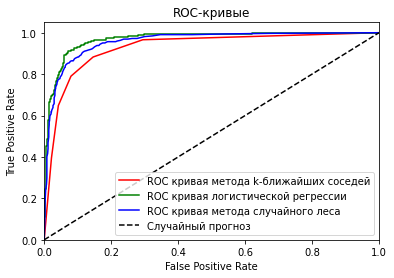

In [27]:
plt.plot(fpr_knn, tpr_knn, color='red',
         label='ROC кривая метода k-ближайших соседей' % knn_roc_auc)
plt.plot(fpr_lr, tpr_lr, color='green',
         label='ROC кривая логистической регрессии' % lr_roc_auc)
plt.plot(fpr_rfc, tpr_rfc, color='blue',
         label='ROC кривая метода случайного леса' % rfc_roc_auc)
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Случайный прогноз')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()

**Вывод:** в ходе выполнения лабораторной работы изучены алгоритмы и методы классификации данных. Были разработаны предсказательные модели, вычисляющие по набору признаков, уйдёт ли клиент из фитнес-клуба на основе методов: k- ближайших соседей, логистической регрессии, случайного леса. выли высчитаны метрики, позволяющие оценить качество работы классификаторов. Лучше всего высчитывает предсказания классификатор, основанный на методе логистической регрессии, а хуже всех себя показал метод k-ближайших соседей. Тем не менее, все три метода классификации данных показали неплохие результаты. Для каждого метода были, также, были построены матрицы неточностей и график ROC-кривых, который подтвердил полученные оценки качества работы методов классификации.

### Дополнительное задание

Вычислим долю правильных ответов при использовании метода k-ближайших соседей для k от 2 до 20:

In [65]:
count = []
res = []
for i in range(2,21):
    count.append(i)
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean', weights='uniform') # Инициализируем модель
    knn.fit(x_train, y_train)
    train_predictions = knn.predict(x_test)
    res.append(accuracy_score(y_test, train_predictions))
d = {'count': count, 'res': res}
df = pd.DataFrame(data=d)
df

,count,res
0,2,0.860833
1,3,0.878333
2,4,0.875000
3,5,0.885000
4,6,0.887500
5,7,0.890833
6,8,0.896667
7,9,0.897500
8,10,0.894167
9,11,0.890833
